# ML match for LOFAR and the combined PanSTARRS WISE catalogue: Compute the $Q_0$

## Configuration

### Load libraries and setup

In [1]:
import numpy as np
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord, search_around_sky
from IPython.display import clear_output

In [2]:
from mltier1 import Field, Q_0, parallel_process, describe

In [3]:
%load_ext autoreload

In [4]:
%autoreload

In [5]:
from IPython.display import clear_output

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Area limits

In [7]:
# Busy week Hatfield 2017
ra_down = 170.
ra_up = 190.
dec_down = 46.8
dec_up = 55.9

In [8]:
field = Field(170.0, 190.0, 46.8, 55.9)

## Load data

In [9]:
combined = Table.read("pw.fits")

In [10]:
lofar_all = Table.read("data/LOFAR_HBA_T1_DR1_catalog_v0.9.srl.fits")

In [11]:
np.array(combined.colnames)

array(['AllWISE', 'objID', 'ra', 'dec', 'raErr', 'decErr', 'W1mag',
       'W1magErr', 'i', 'iErr'],
      dtype='<U8')

In [12]:
np.array(lofar_all.colnames)

array(['Source_Name', 'RA', 'E_RA', 'E_RA_tot', 'DEC', 'E_DEC',
       'E_DEC_tot', 'Peak_flux', 'E_Peak_flux', 'E_Peak_flux_tot',
       'Total_flux', 'E_Total_flux', 'E_Total_flux_tot', 'Maj', 'E_Maj',
       'Min', 'E_Min', 'PA', 'E_PA', 'Isl_rms', 'S_Code', 'Mosaic_ID',
       'Isl_id'],
      dtype='<U16')

### Filter catalogues

In [13]:
lofar = field.filter_catalogue(lofar_all, colnames=("RA", "DEC"))

### Sky coordinates

In [15]:
coords_combined = SkyCoord(combined['ra'], 
                           combined['dec'], 
                           unit=(u.deg, u.deg), 
                           frame='icrs')

In [17]:
coords_lofar = SkyCoord(lofar['RA'], 
                       lofar['DEC'], 
                       unit=(u.deg, u.deg), 
                       frame='icrs')

### Summary of galaxy types in the combined catalogue

In [18]:
combined_matched = (~np.isnan(combined["i"]) & 
                    ~np.isnan(combined["W1mag"]))
np.sum(combined_matched) # Matches

8196213

In [19]:
combined_panstarrs = (~np.isnan(combined["i"]) & 
                      np.isnan(combined["W1mag"]))
np.sum(combined_panstarrs) # Only PanSTARSS

18583323

In [20]:
combined_wise =(np.isnan(combined["i"]) & 
                ~np.isnan(combined["W1mag"]))
np.sum(combined_wise) # Only WISE

5023475

In [21]:
combined_i = combined_matched | combined_panstarrs
combined_w1 = combined_matched | combined_wise

## $Q_0$ dependence on the radius

We will iterate 10 times for each radius. However, the error is so small that a direct computation can be accurate to 4 significant figures.

In [22]:
n_iter = 10

In [23]:
rads = list(range(1,26))

### i-band

In [24]:
q_0_comp_i = Q_0(coords_lofar, coords_combined[combined_i], field)

In [25]:
q_0_rad_i = []
for radius in rads:
    q_0_rad_aux = []
    for i in range(n_iter):
        out = q_0_comp_i(radius=radius)
        q_0_rad_aux.append(out)
    q_0_rad_i.append(np.mean(q_0_rad_aux))
    print("{:2d} {:7.5f} +/- {:7.5f} [{:7.5f} {:7.5f}]".format(radius, 
            np.mean(q_0_rad_aux), np.std(q_0_rad_aux), 
            np.min(q_0_rad_aux), np.max(q_0_rad_aux)))

 1 0.37348 +/- 0.00016 [0.37315 0.37367]
 2 0.46354 +/- 0.00027 [0.46293 0.46389]
 3 0.48792 +/- 0.00042 [0.48730 0.48857]
 4 0.50089 +/- 0.00040 [0.50030 0.50186]
 5 0.50898 +/- 0.00046 [0.50817 0.50977]
 6 0.51341 +/- 0.00056 [0.51219 0.51410]
 7 0.51868 +/- 0.00115 [0.51724 0.52079]
 8 0.52172 +/- 0.00084 [0.52023 0.52278]
 9 0.52678 +/- 0.00112 [0.52505 0.52852]
10 0.52792 +/- 0.00103 [0.52662 0.53005]
11 0.53245 +/- 0.00141 [0.53091 0.53509]
12 0.53549 +/- 0.00197 [0.53326 0.53850]
13 0.53666 +/- 0.00245 [0.53223 0.54035]
14 0.53918 +/- 0.00291 [0.53258 0.54253]
15 0.54248 +/- 0.00206 [0.53861 0.54618]
16 0.54512 +/- 0.00316 [0.54005 0.55060]
17 0.54650 +/- 0.00243 [0.54162 0.55107]
18 0.55247 +/- 0.00208 [0.54860 0.55578]
19 0.55060 +/- 0.00354 [0.54374 0.55574]
20 0.55354 +/- 0.00502 [0.54651 0.56213]
21 0.55774 +/- 0.00430 [0.54972 0.56514]
22 0.56159 +/- 0.00335 [0.55384 0.56464]
23 0.56286 +/- 0.00507 [0.55291 0.57044]
24 0.57024 +/- 0.00404 [0.56448 0.57610]
25 0.57276 +/- 0

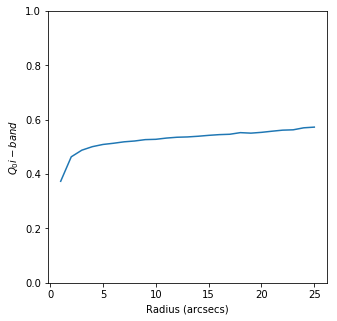

In [26]:
plt.rcParams["figure.figsize"] = (5,5)
plot(rads, q_0_rad_i)
xlabel("Radius (arcsecs)")
ylabel("$Q_0 i-band$")
ylim([0, 1]);

### W1-band

In [27]:
q_0_comp_w1 = Q_0(coords_lofar, coords_combined[combined_w1], field)

In [28]:
q_0_rad_w1 = []
for radius in rads:
    q_0_rad_aux = []
    for i in range(n_iter):
        out = q_0_comp_w1(radius=radius)
        q_0_rad_aux.append(out)
    q_0_rad_w1.append(np.mean(q_0_rad_aux))
    print("{:2d} {:7.5f} +/- {:7.5f} [{:7.5f} {:7.5f}]".format(radius, 
            np.mean(q_0_rad_aux), np.std(q_0_rad_aux), 
            np.min(q_0_rad_aux), np.max(q_0_rad_aux)))

 1 0.45846 +/- 0.00012 [0.45827 0.45865]
 2 0.60391 +/- 0.00018 [0.60372 0.60435]
 3 0.65122 +/- 0.00018 [0.65086 0.65142]
 4 0.67652 +/- 0.00019 [0.67605 0.67673]
 5 0.69308 +/- 0.00017 [0.69281 0.69326]
 6 0.70593 +/- 0.00034 [0.70529 0.70644]
 7 0.71865 +/- 0.00046 [0.71799 0.71931]
 8 0.73138 +/- 0.00058 [0.73022 0.73222]
 9 0.74451 +/- 0.00042 [0.74402 0.74530]
10 0.75463 +/- 0.00049 [0.75383 0.75565]
11 0.76279 +/- 0.00056 [0.76192 0.76408]
12 0.76629 +/- 0.00080 [0.76474 0.76786]
13 0.77010 +/- 0.00049 [0.76952 0.77104]
14 0.77427 +/- 0.00062 [0.77354 0.77520]
15 0.77638 +/- 0.00095 [0.77476 0.77824]
16 0.77795 +/- 0.00069 [0.77648 0.77903]
17 0.77799 +/- 0.00095 [0.77659 0.77964]
18 0.77742 +/- 0.00140 [0.77524 0.77984]
19 0.77702 +/- 0.00104 [0.77571 0.77956]
20 0.77724 +/- 0.00110 [0.77552 0.77918]
21 0.77485 +/- 0.00183 [0.77195 0.77841]
22 0.77331 +/- 0.00251 [0.76867 0.77819]
23 0.77071 +/- 0.00155 [0.76798 0.77325]
24 0.76833 +/- 0.00210 [0.76482 0.77282]
25 0.76279 +/- 0

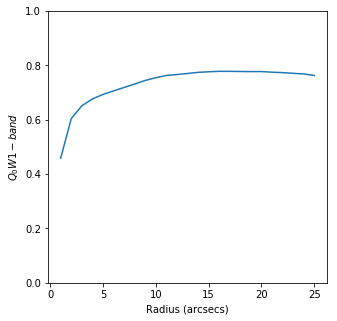

In [29]:
plt.rcParams["figure.figsize"] = (5,5)
plot(rads, q_0_rad_w1)
xlabel("Radius (arcsecs)")
ylabel("$Q_0 W1-band$")
ylim([0, 1]);